In [121]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from shapely import wkt
import os

In [122]:
CITY = 'Memphis'
COUNTY = 'Shelby'

In [ ]:
tn_city_boundaries = gpd.read_file("zip:///home/rishav/Programs/move_od/data/TN_City_Boundaries.zip")
city_limits = tn_city_boundaries[tn_city_boundaries['NAME'] == CITY]

lodes_data = pd.read_csv(f'./generated_OD/{COUNTY}_TN_2021-01-04_2021-01-04/lodes_combs/lodes_2021-01-04.csv')
lodes_data['origin_geom'] = lodes_data['origin_geom'].apply(wkt.loads)
lodes_data = gpd.GeoDataFrame(lodes_data, geometry='origin_geom', crs='EPSG:4326')
lodes_data = lodes_data.to_crs(city_limits.crs)

city_lodes = lodes_data[lodes_data.origin_geom.within(city_limits.unary_union)]

In [118]:
lodes_data['dest_geom'] = lodes_data['dest_geom'].apply(wkt.loads)
lodes_data.set_geometry('dest_geom', inplace=True, crs='EPSG:4326')
lodes_data = lodes_data.to_crs(city_limits.crs)

dest_within_city = lodes_data[lodes_data.geometry.within(city_limits.unary_union)]

city_lodes_both = city_lodes[city_lodes.index.isin(dest_within_city.index)]
city_lodes_both.set_geometry('origin_geom', inplace=True)

/home/rishav/Programs/move_od/.venv/lib/python3.10/site-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [119]:
os.makedirs('origin_dest', exist_ok=True)
city_lodes_both.to_csv(f'./origin_dest/{CITY}_origin_dest.csv')

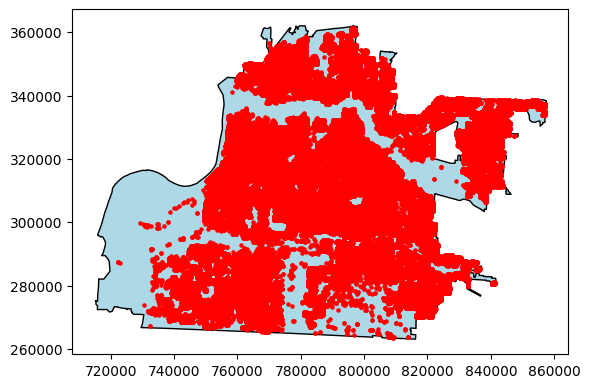

In [120]:
import matplotlib.pyplot as plt

# Plot city_limits
fig, ax = plt.subplots()
city_limits.plot(ax=ax, color='lightblue', edgecolor='black')  # Adjust colors as needed

# Plot od_data geometries on the same axis
city_lodes.plot(ax=ax, marker='o', color='red', markersize=5)  # Adjust marker and color

# gpd.GeoDataFrame(data=[Point(36.307354483402435, -86.71601315922481)], columns=['geometry']).plot(ax=ax, marker='o', color='red', markersize=5)  # Adjust marker and color

plt.show()